# Testing statistics

In [72]:
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import statsmodels.api as sm
import statistics
import os 
from scipy.stats import norm

## The irreproducibility of p-values

P-values are themselves rather irreproducible. This is a bit hard to imagine, so we will have a look t that.  

First, lets simulate data. We want to have two normal distributions, which are supposed to be borderline significantly different with a significance level of alpha = 0.05  

Ttest_indResult(statistic=-4.242545762054514, pvalue=0.000489698076562683)

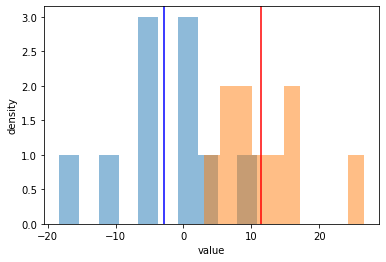

In [57]:
mean1 = 0
mean2 = 10
sd= 10 
n=10

s1 = np.random.normal(mean1, sd,n)
s2 = np.random.normal(mean2, sd,n)

plt.hist(s1,alpha=0.5)
plt.hist(s2,alpha=0.5)
plt.xlabel("value")
plt.ylabel("density")
plt.axvline(statistics.mean(s1), color="blue")
plt.axvline(statistics.mean(s2), color="red")

st.ttest_ind(s1,s2)

Now lets do this many times to have a look how often we get the p-value.

Text(0.5, 0, '-log10(p)')

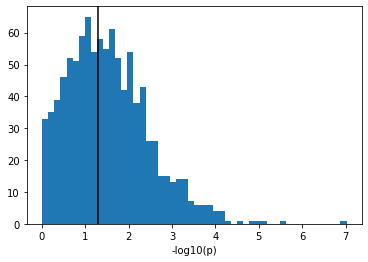

In [58]:
pvals = []

for _ in range (1000):
    np.random.seed()
    samp1 = np.random.normal(mean1, sd, n)
    samp2 = np.random.normal(mean2, sd, n)
    new_test = st.ttest_ind(samp1,samp2) 
    pvals.append(new_test[1])

    
    
#Lets plot this
plt.hist(-np.log10(pvals),bins=50)
plt.axvline(-np.log10(0.05), color="black")
plt.xlabel("-log10(p)")


We are indeed at the significance level most of the time, but at the same time we would frquently call our results "not significant" and sometimes "highly significant".  
Does this become better with increased sample size? 

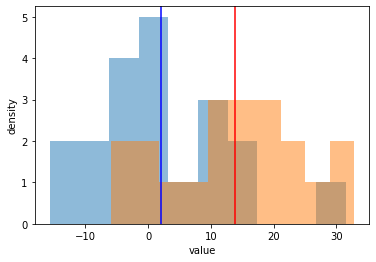

In [64]:
n=20

s1 = np.random.normal(mean1, sd,n)
s2 = np.random.normal(mean2, sd,n)

plt.hist(s1,alpha=0.5)
plt.hist(s2,alpha=0.5)
plt.xlabel("value")
plt.ylabel("density")
plt.axvline(statistics.mean(s1), color="blue")
plt.axvline(statistics.mean(s2), color="red")

Text(0.5, 0, '-log10(p)')

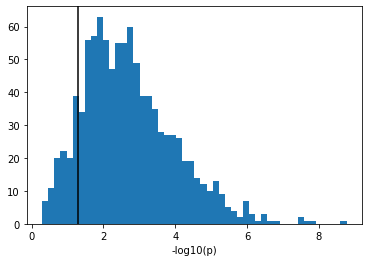

In [65]:
pvals = []

for _ in range (1000):
    np.random.seed()
    samp1 = np.random.normal(mean1, sd, n)
    samp2 = np.random.normal(mean2, sd, n)
    new_test = st.ttest_ind(samp1,samp2) 
    pvals.append(new_test[1])

    
    
#Lets plot this
plt.hist(-np.log10(pvals),bins=50)
plt.axvline(-np.log10(0.05), color="black")
plt.xlabel("-log10(p)")

Indeed it does. The "power" of our analysis increases, but the range is still very wide. And this does not really change! 

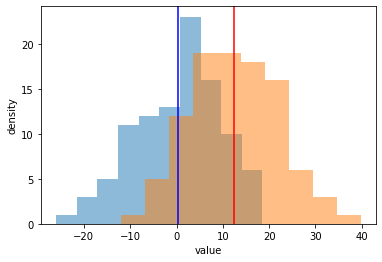

In [66]:
n=100

s1 = np.random.normal(mean1, sd,n)
s2 = np.random.normal(mean2, sd,n)

plt.hist(s1,alpha=0.5)
plt.hist(s2,alpha=0.5)
plt.xlabel("value")
plt.ylabel("density")
plt.axvline(statistics.mean(s1), color="blue")
plt.axvline(statistics.mean(s2), color="red")



Text(0.5, 0, '-log10(p)')

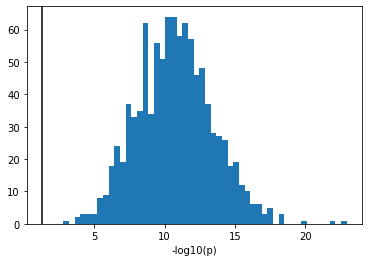

In [67]:
pvals = []

for _ in range (1000):
    np.random.seed()
    samp1 = np.random.normal(mean1, sd, n)
    samp2 = np.random.normal(mean2, sd, n)
    new_test = st.ttest_ind(samp1,samp2) 
    pvals.append(new_test[1])

    
    
#Lets plot this
plt.hist(-np.log10(pvals),bins=50)
plt.axvline(-np.log10(0.05), color="black")
plt.xlabel("-log10(p)")

A good way to visualise this is by plotting the the p-value AND the effect size. In our case the difference between the mean 

          diff     pvals
0    14.757888  0.001952
1     9.277700  0.047603
2    11.813991  0.005106
3     6.559051  0.131269
4     9.486750  0.079564
..         ...       ...
995   6.951709  0.181922
996  11.933497  0.001619
997   0.474080  0.909645
998   5.257862  0.137112
999   7.258036  0.097843

[1000 rows x 2 columns]


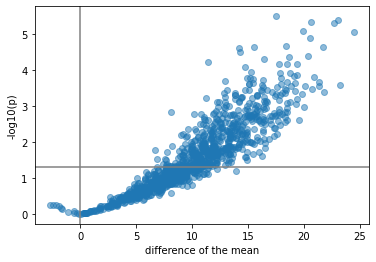

In [83]:
n=10

pvals = []
diffs = []

for _ in range (1000):
    np.random.seed()
    samp1 = np.random.normal(mean1, sd, n)
    samp2 = np.random.normal(mean2, sd, n)
    new_test = st.ttest_ind(samp1,samp2) 
    diff = statistics.mean(samp2)-statistics.mean(samp1)
    diffs.append(diff)
    pvals.append(new_test[1])

df = pd.DataFrame({'diff': diffs, 'pvals': pvals})

print(df)
    
#Lets plot this
plt.scatter(df["diff"], -np.log10(df["pvals"]),  alpha=0.5)
plt.xlabel("difference of the mean")
plt.ylabel("-log10(p)")
plt.axhline(-np.log10(0.05), color="grey")
plt.axvline(0, color="grey")

t

Such plots are called volcano plots.

## Leukocyte counts 

![blood.jpg](attachment:blood.jpg)  

Adapted from A. Rad and M. Häggström. CC-BY-SA 3.0 license

We are doing an experiment to see whether a COVID-19 infection changes the white blood cell counts in comparison to normal. 
From the literature (i.e. internet) we know that a "normal" whilte blood cell count is between 4000 and 11000 white blood cells per microliter. We measure this in 100 patients and 100 controls and note down the data in "white blood cell counts per microliter"  
Another disease where we expect a difference is chronic lymphocytic leukemia (CLL), so we decide to also collect these data from 100 patients.  

Lets import these data:

In [3]:
dat = pd.read_csv('https://raw.githubusercontent.com/BiAPoL/Bio-image_Analysis_with_Python/main/biostatistics/data/leukocyte_counts.csv')

print(dat)

        healthy      COVID19          CLL
0   8112.953628  7938.261511  7995.138663
1   8049.767571  8815.331615  7169.552971
2   8092.332735  7830.310038  6780.272875
3   7498.168785  6240.226527  9962.335281
4   7143.005306  7745.239515  7786.586473
..          ...          ...          ...
95  7034.384604  6599.861270  6572.275825
96  7745.826977  8654.514650  8934.513929
97  8604.575198  8732.430100  7879.404564
98  7131.230127  7676.868854  7464.286189
99  7734.212640  7591.721753  6862.094897

[100 rows x 3 columns]


Lets first focus on COVID19 and the first step: Visualising the data and summary statistics

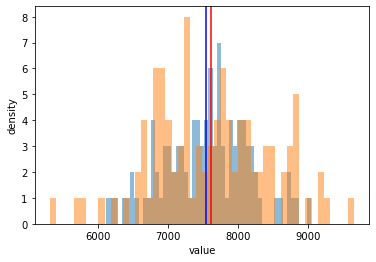

In [84]:
plt.hist(dat['healthy'],bins = 50,alpha=0.5)
plt.hist(dat['COVID19'],bins = 50,alpha=0.5)
plt.xlabel("value")
plt.ylabel("density")
plt.axvline(statistics.mean(dat['healthy']), color="blue")
plt.axvline(statistics.mean(dat['COVID19']), color="red")

How are these data distributed?

In [6]:
dat["healthy"].describe()

count     100.000000
mean     7536.429388
std       615.775587
min      6109.265314
25%      7120.765598
50%      7595.581039
75%      7966.730934
max      9042.361051
Name: healthy, dtype: float64

In [7]:
dat["COVID19"].describe()

count     100.000000
mean     7605.989209
std       841.092948
min      5313.659358
25%      6968.453179
50%      7638.540803
75%      8151.393516
max      9652.651211
Name: COVID19, dtype: float64

Can we perform a t-test on these data?

In [8]:
st.ttest_ind(dat['healthy'],dat['COVID19'])

Ttest_indResult(statistic=-0.6672986139650978, pvalue=0.5053583624156102)

How do you interpret this result?  
Were you allowed to perform a t-test in the first place?   
If yes, why? If not, why not? What would be an alternative?


Is there a difference in Leukocyte counts in chronic lymphocytic leukemia? 

For the COVID cases you are still unsure, whether you had to reject H0, because you were just not looking at enough patients. Therefore you decide on a little simulation experiment: If the effect size and distributions were true, how many patients and controls would you estimate to look at for it to become significant with a significance level of alpha = 0.05?   